In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import copy



## Reading data

In [2]:
columns = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education_num',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital_gain',
    'capital_loss',
    'hours_per_week',
    'native_country',
    'income'
]
df = pd.read_csv("./data/adult.data",  delimiter=",", names=columns)

In [3]:
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [6]:
print(df["native_country"].value_counts())
print('-' * 25)
print(df["workclass"].value_counts())
print('-' * 25)
print(df["education"].value_counts())
print('-' * 25)
print(df["marital_status"].value_counts())
print('-' * 25)
print(df["relationship"].value_counts())
print('-' * 25)
print(df["race"].value_counts())
print('-' * 25)
print(df["sex"].value_counts())

native_country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [7]:
df['workclass'] = df['workclass'].str.strip()
df['education'] = df['education'].str.strip()
df['marital_status'] = df['marital_status'].str.strip()
df['occupation'] = df['occupation'].str.strip()
df['relationship'] = df['relationship'].str.strip()
df['race'] = df['race'].str.strip()
df['sex'] = df['sex'].str.strip()
df['native_country'] = df['native_country'].str.strip()
df['income'] = df['income'].str.strip()

In [8]:
#Only selecting United-States.
df = df[df['native_country'] == 'United-States'] 

In [9]:
df = df[ df['native_country'] != '?']
df = df[ df['occupation'] != '?']
df = df[ df['workclass'] != '?']

In [10]:
# print(df['age'].value_counts())
# print(df['fnlwgt'].value_counts())
# print(df['education_num'].value_counts())
# print(df['capital_gain'].value_counts())
# print(df['capital_loss'].value_counts())
# print(df['hours_per_week'].value_counts())

In [11]:
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [12]:
df['race'].replace('Black', 'Other', inplace=True)
df['race'].replace('Asian-Pac-Islander', 'Other', inplace=True)
df['race'].replace('Amer-Indian-Eskimo', 'Other', inplace=True)
df['race'].replace('Amer-Indian-Eskimo', 'Other', inplace=True)
df['race'].replace('Other', 'Other', inplace=True)

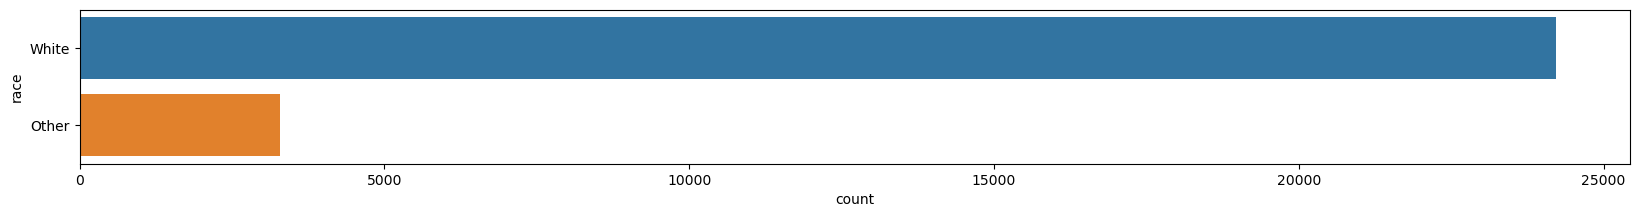

In [13]:
fig = plt.figure(figsize=(20,2))
sns.countplot(y='race', data=df)
plt.show()

In [14]:
df['education'].replace('11th', 'dropout', inplace= True)
df['education'].replace('12th', 'dropout', inplace= True)
df['education'].replace('10th', 'dropout', inplace= True)
df['education'].replace('7th-8th', 'dropout', inplace= True)
df['education'].replace('9th', 'dropout', inplace= True)
df['education'].replace('5th-6th', 'dropout', inplace= True)
df['education'].replace('1st-4th', 'dropout', inplace= True)
df['education'].replace('Preschool', 'dropout', inplace= True)


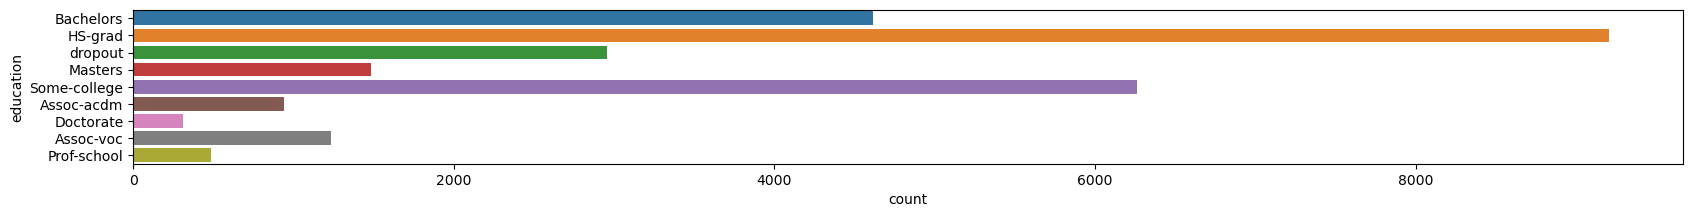

In [15]:
fig = plt.figure(figsize=(20,2))
sns.countplot(y='education', data=df)
plt.show()

In [16]:
df["income"] = df["income"].replace(to_replace=["<=50K", ">50K"], value=[0, 1])


In [17]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
count,27504.000000,2.750400e+04,27504.000000,27504.000000,27504.000000,27504.000000,27504.000000
mean,38.504290,1.870550e+05,10.222150,1120.499782,90.272724,40.970986,0.254327
std,13.184357,1.047236e+05,2.378829,7509.268774,408.469723,12.041120,0.435490
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.158562e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.768105e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.341080e+05,13.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [18]:
def plot_frequency_distribution(column, ax):
    sns.histplot(df[column], kde=True, ax=ax)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

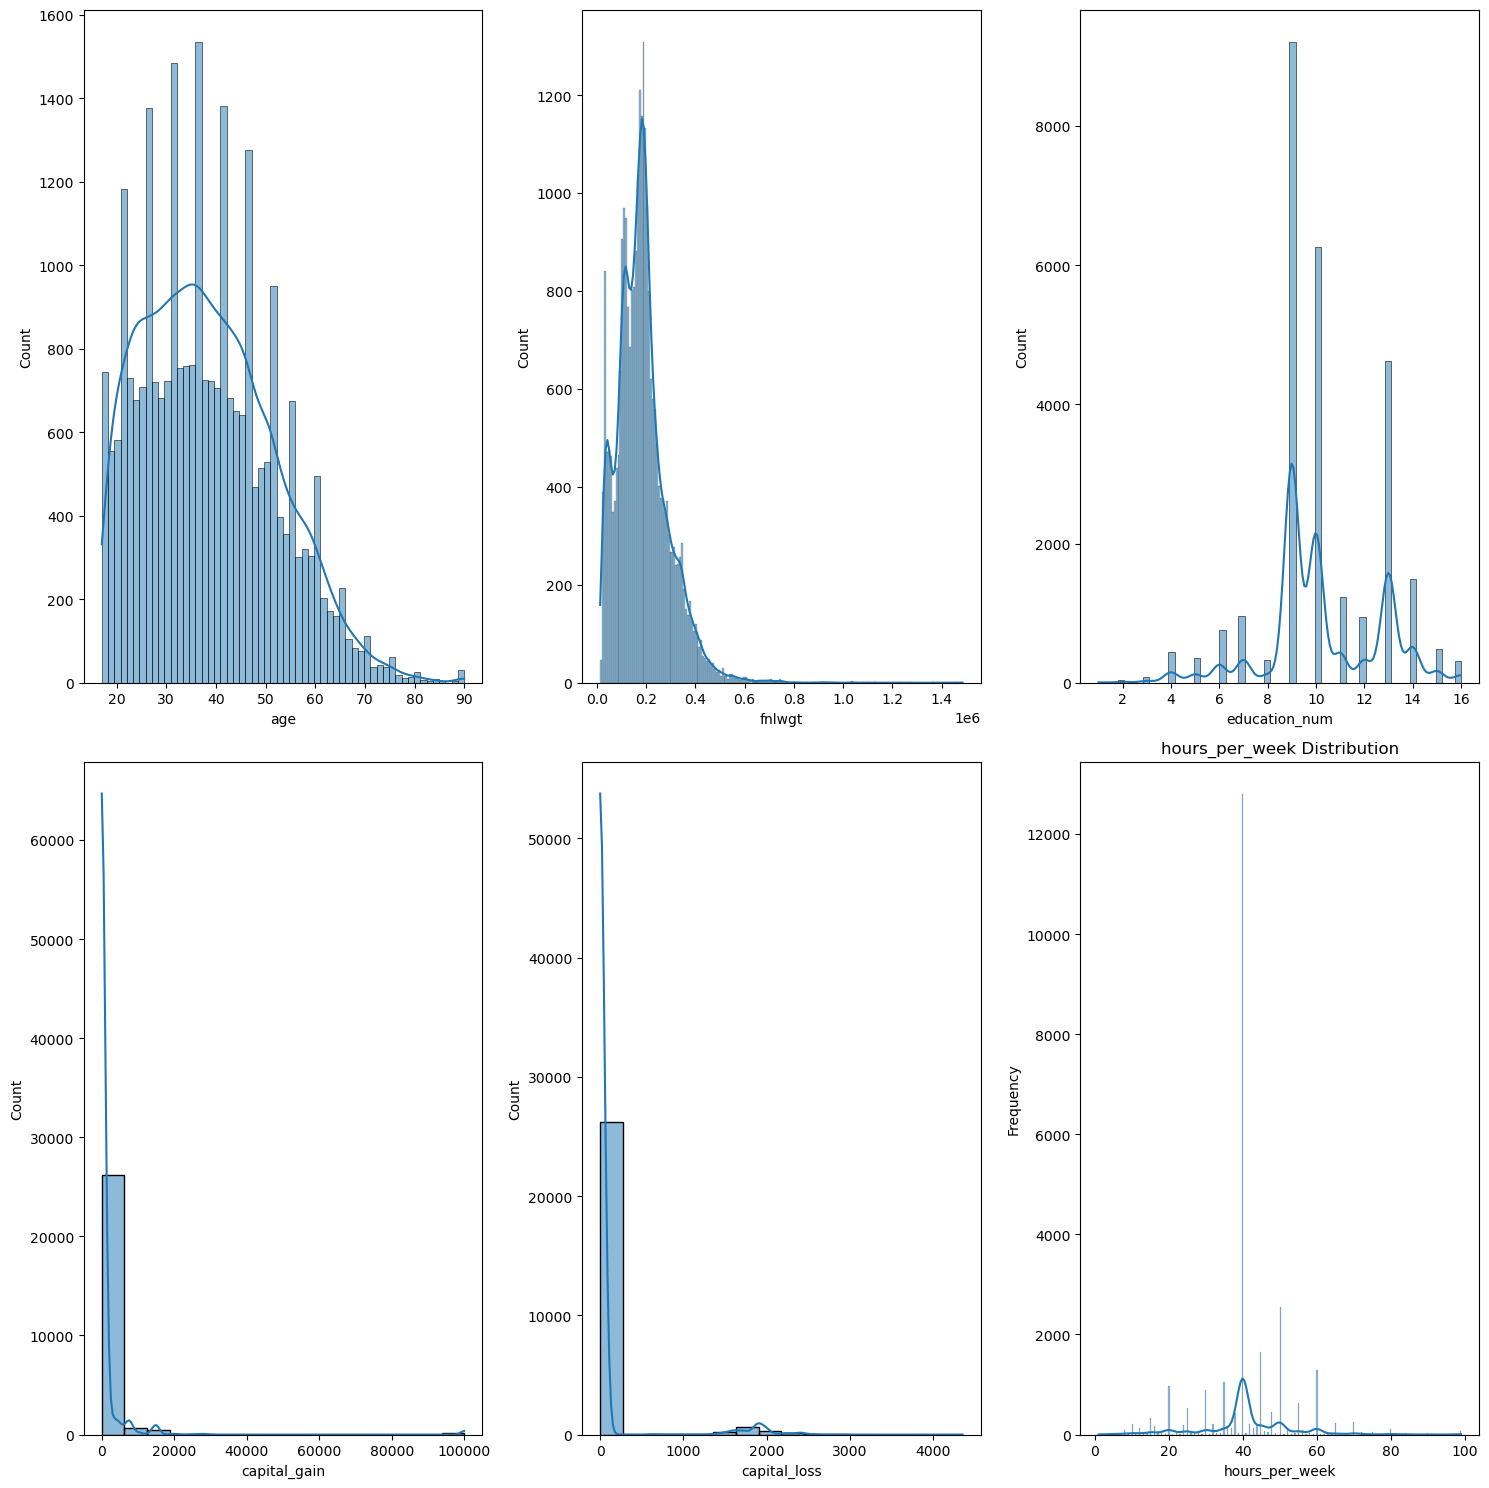

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(15, 15))  

columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    plot_frequency_distribution(column, axes[row, col])
plt.tight_layout()
plt.show()





In [20]:
def plot_distribution(dataframe, column, ax, bins=50):
    
    temp = pd.DataFrame({">50k":dataframe[dataframe["income"]==1][column],
                        "<=50k":dataframe[dataframe["income"]== 0][column]} )
    temp[["<=50k", ">50k"]].plot(kind='hist', ax=ax, bins=bins, stacked=True)

    ax.set_xlabel(column)
    ax.ticklabel_format(style='plain', axis='x')

    

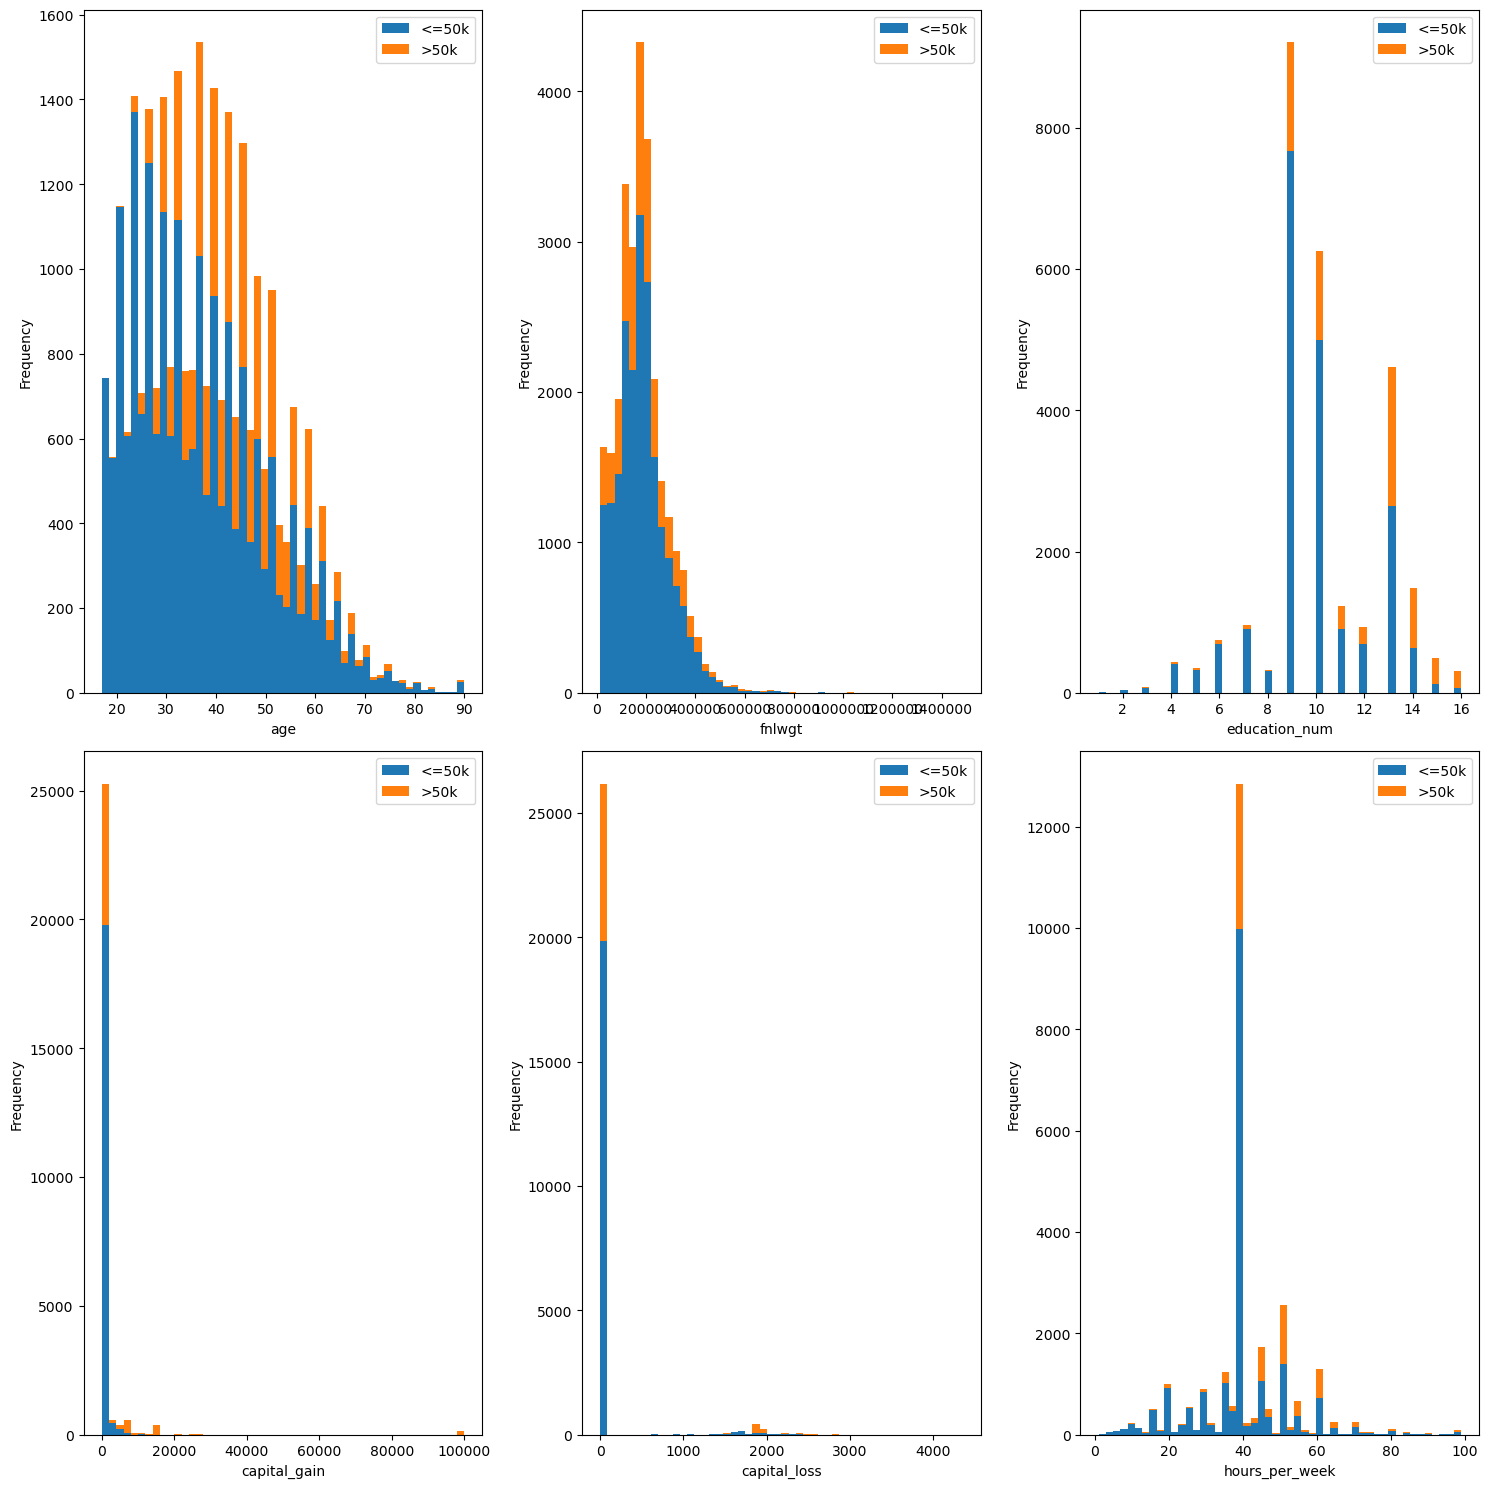

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(15, 15))  
columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    plot_distribution(df,column, axes[row, col])
plt.tight_layout()
plt.show()



#### Removing Outliers

In [22]:
def boxplot_plot(dataframe, column, ax):
    dataframe.boxplot(column = column, vert=False, ax=ax)
    ax.set_title(f"{column} distribution")
    

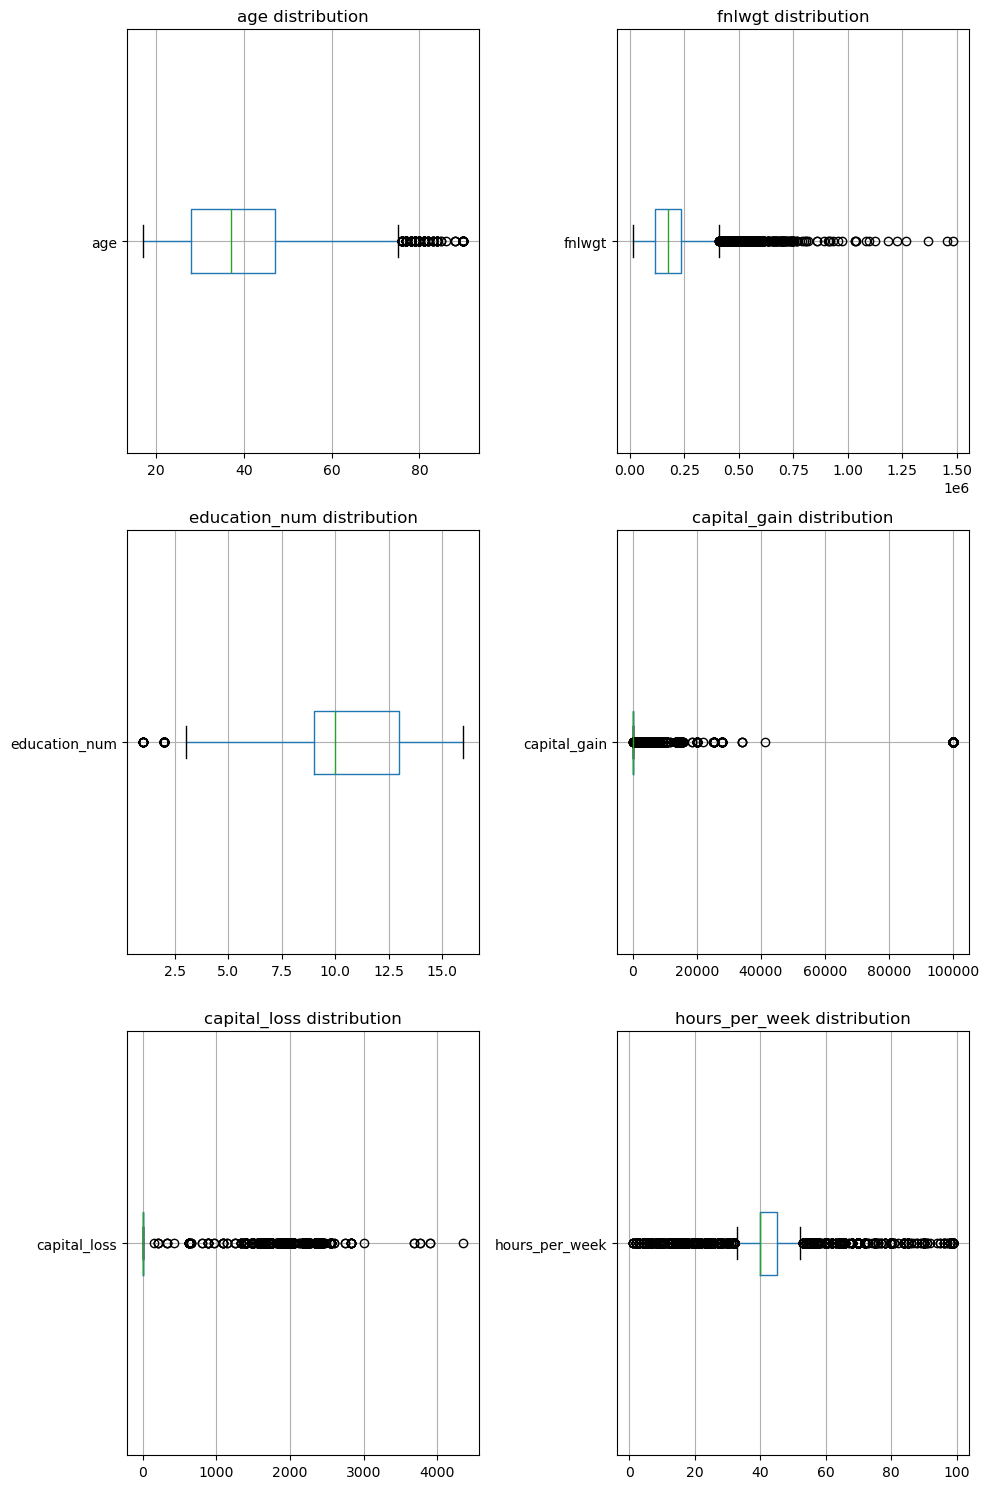

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))  
columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    boxplot_plot(df,column, axes[row, col])
plt.tight_layout()
plt.show()


In [24]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3-Q1
outliers = df[ (df['age'] < Q1 - 1.5*IQR ) | (df['age'] > Q3 + 1.5*IQR)]
df.drop(outliers.index, inplace=True)

Index([   74,   100,   222,   316,   324,   918,   978,  1040,  1168,  1935,
       ...
       28207, 28463, 28721, 28948, 29148, 31030, 31814, 31855, 32277, 32367],
      dtype='int64', length=155)


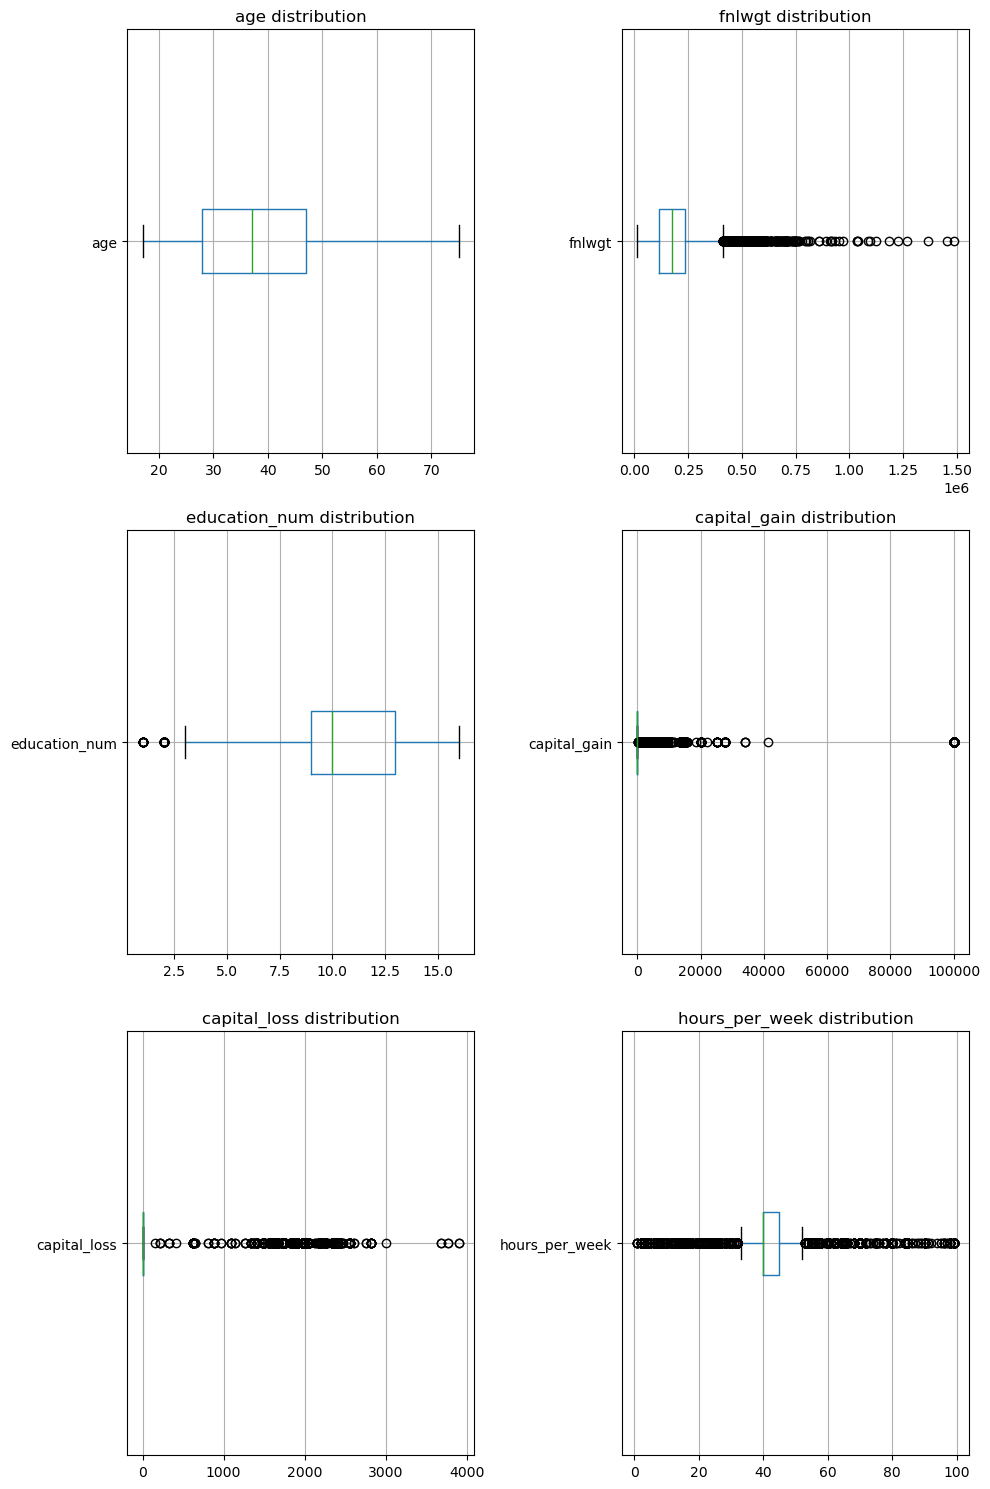

In [25]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))  
columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    boxplot_plot(df,column, axes[row, col])
plt.tight_layout()
plt.show()


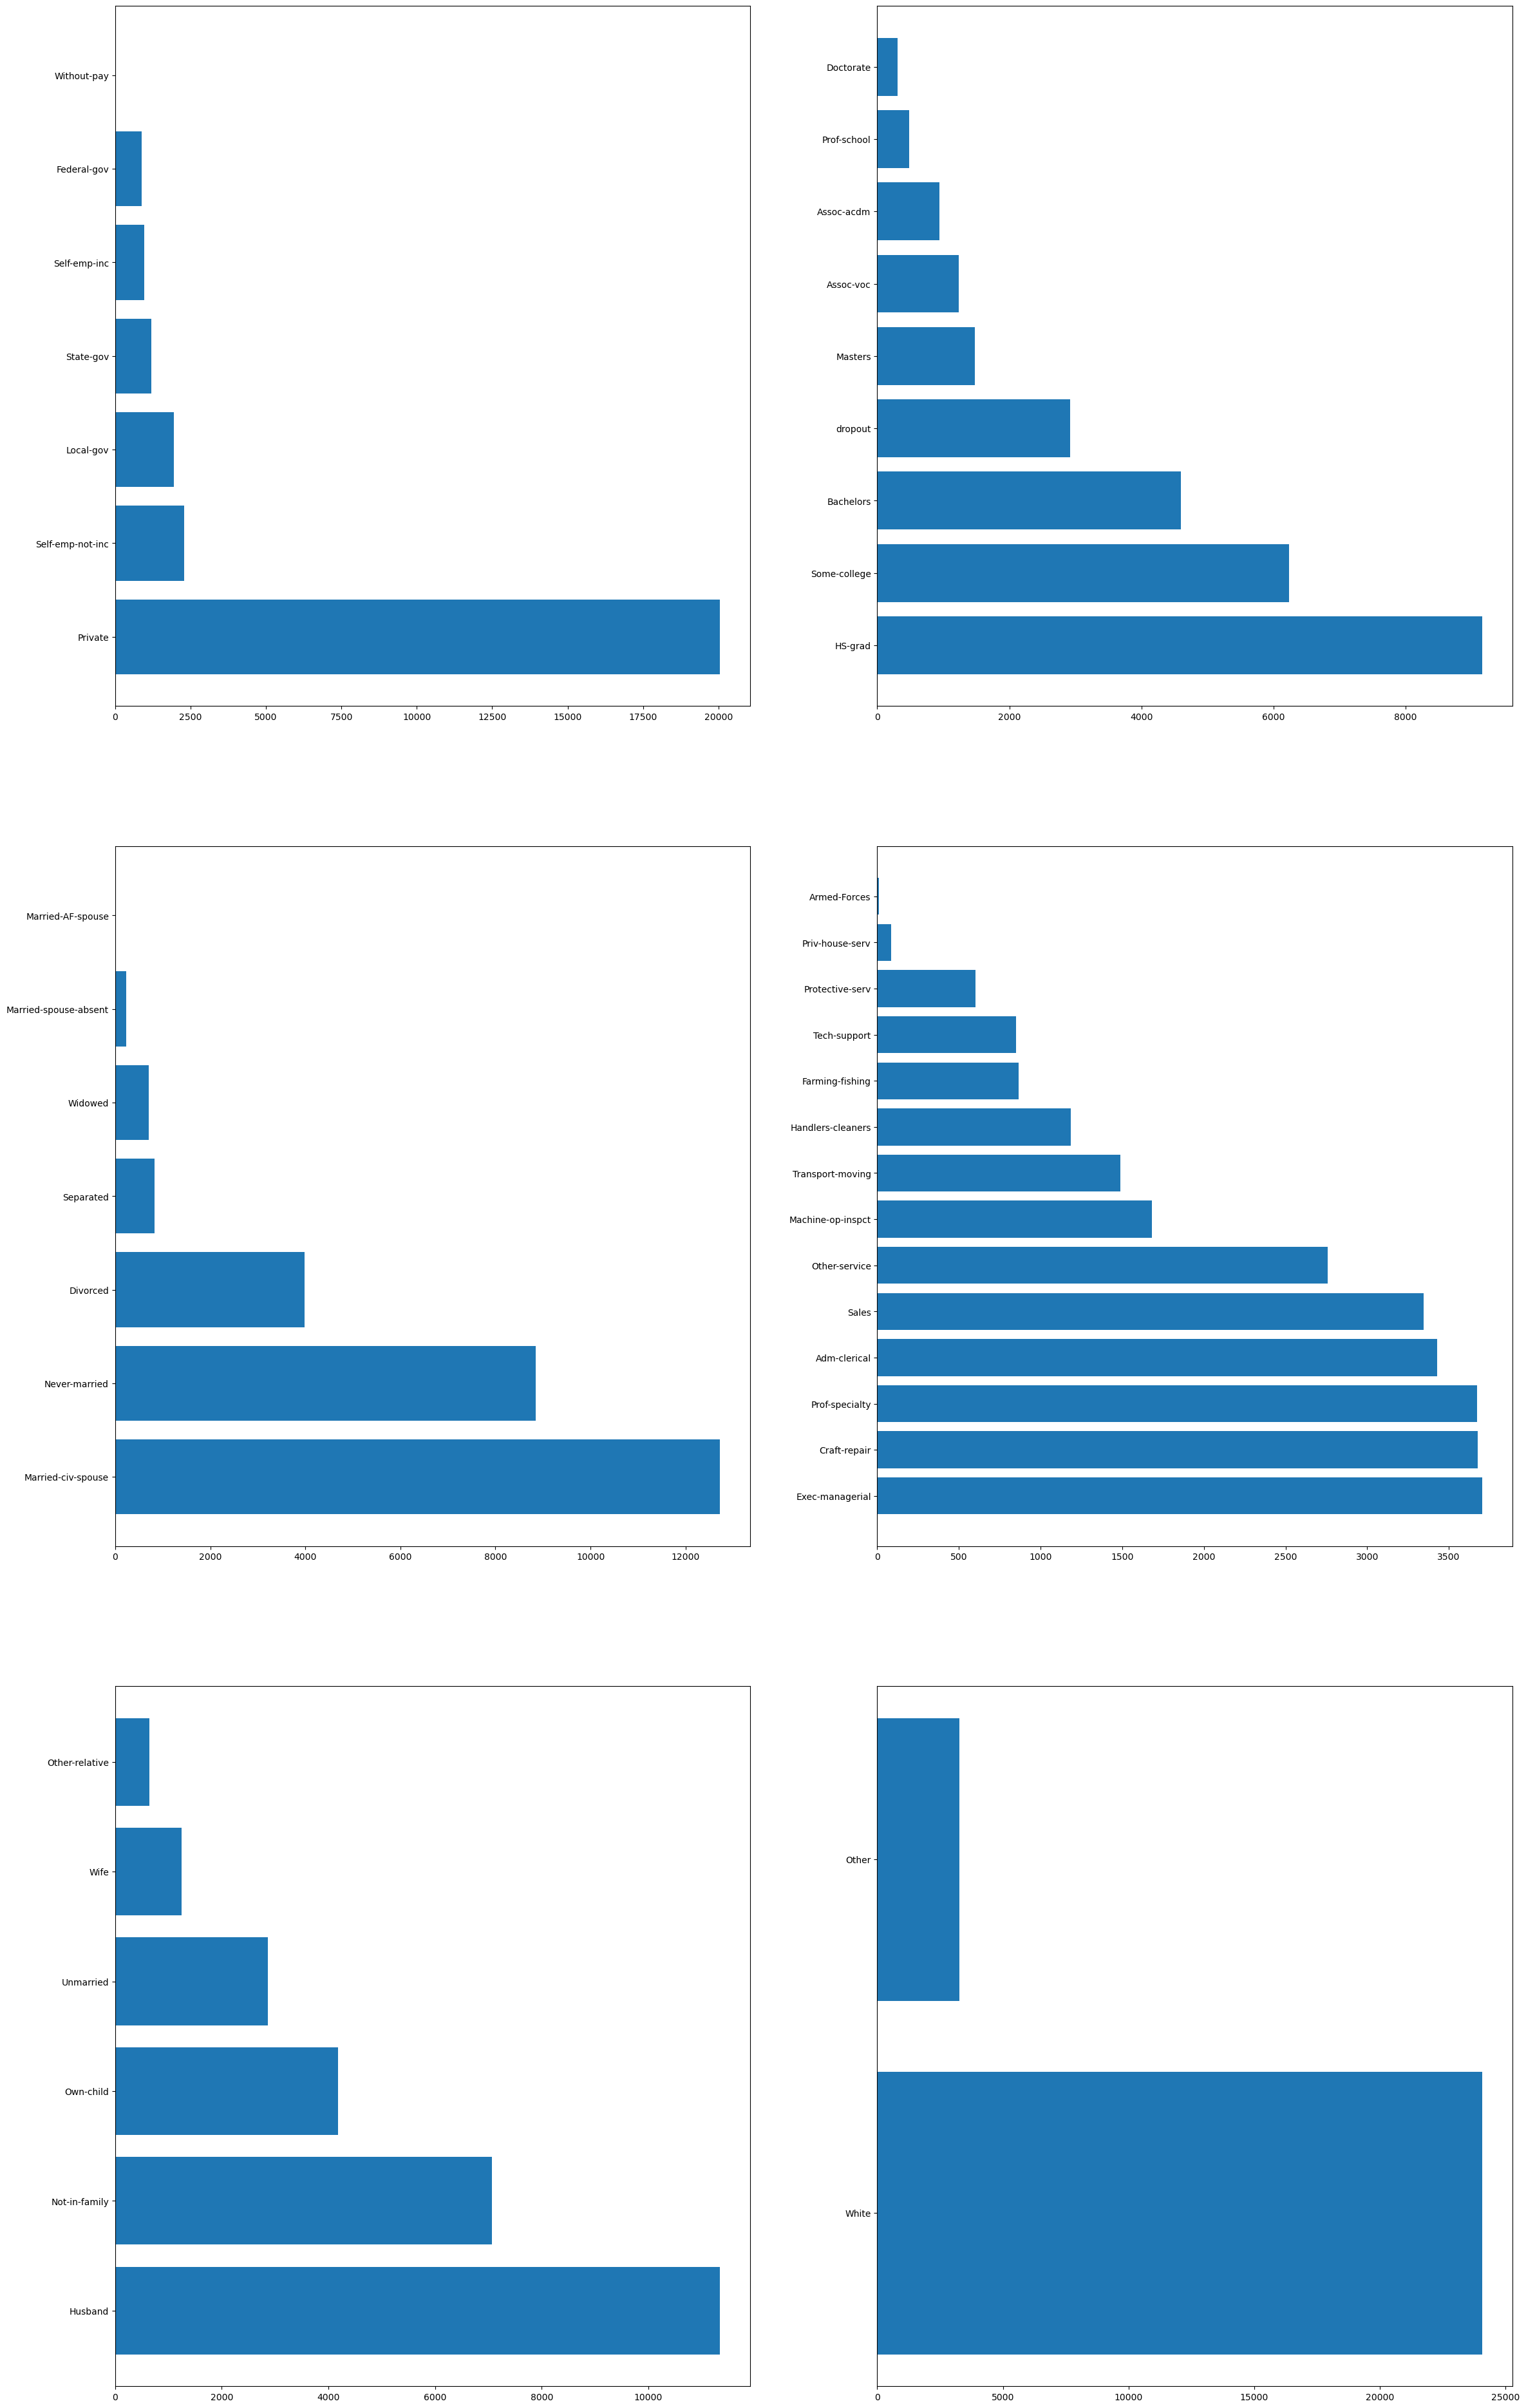

In [26]:
def plot_barh(column, ax):
    value_counts = df[column].value_counts()
    ax.barh(value_counts.index, value_counts.values, )

fig, axs = plt.subplots(3,2, figsize = (28, 48))

columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race']
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    plot_barh(column, axs[row, col])

plt.show()



The model will be biased to United states and race white because they are much higher than the other values in their columns

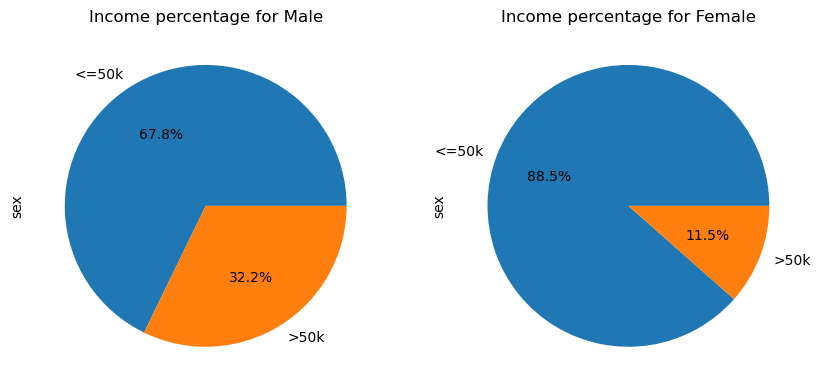

In [27]:
def plot_pie_chart(column, value, ax):
    temp =copy.deepcopy(df)
    temp['income'] =  temp['income'].replace(to_replace=[0,1], value=['<=50k', '>50k'])
    income_counts = temp[temp[column] == value]["income"].value_counts()
    income_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax )
    ax.set_title(f"Income percentage for {value}")
    ax.set_ylabel(column)

fig, axs = plt.subplots(ncols = 2, figsize=(10, 20))
plot_pie_chart('sex', 'Male', axs[0])
plot_pie_chart('sex', 'Female', axs[1])

##### Observations:
- The Percentage of Male with income more than 50k is higher than than the Female.


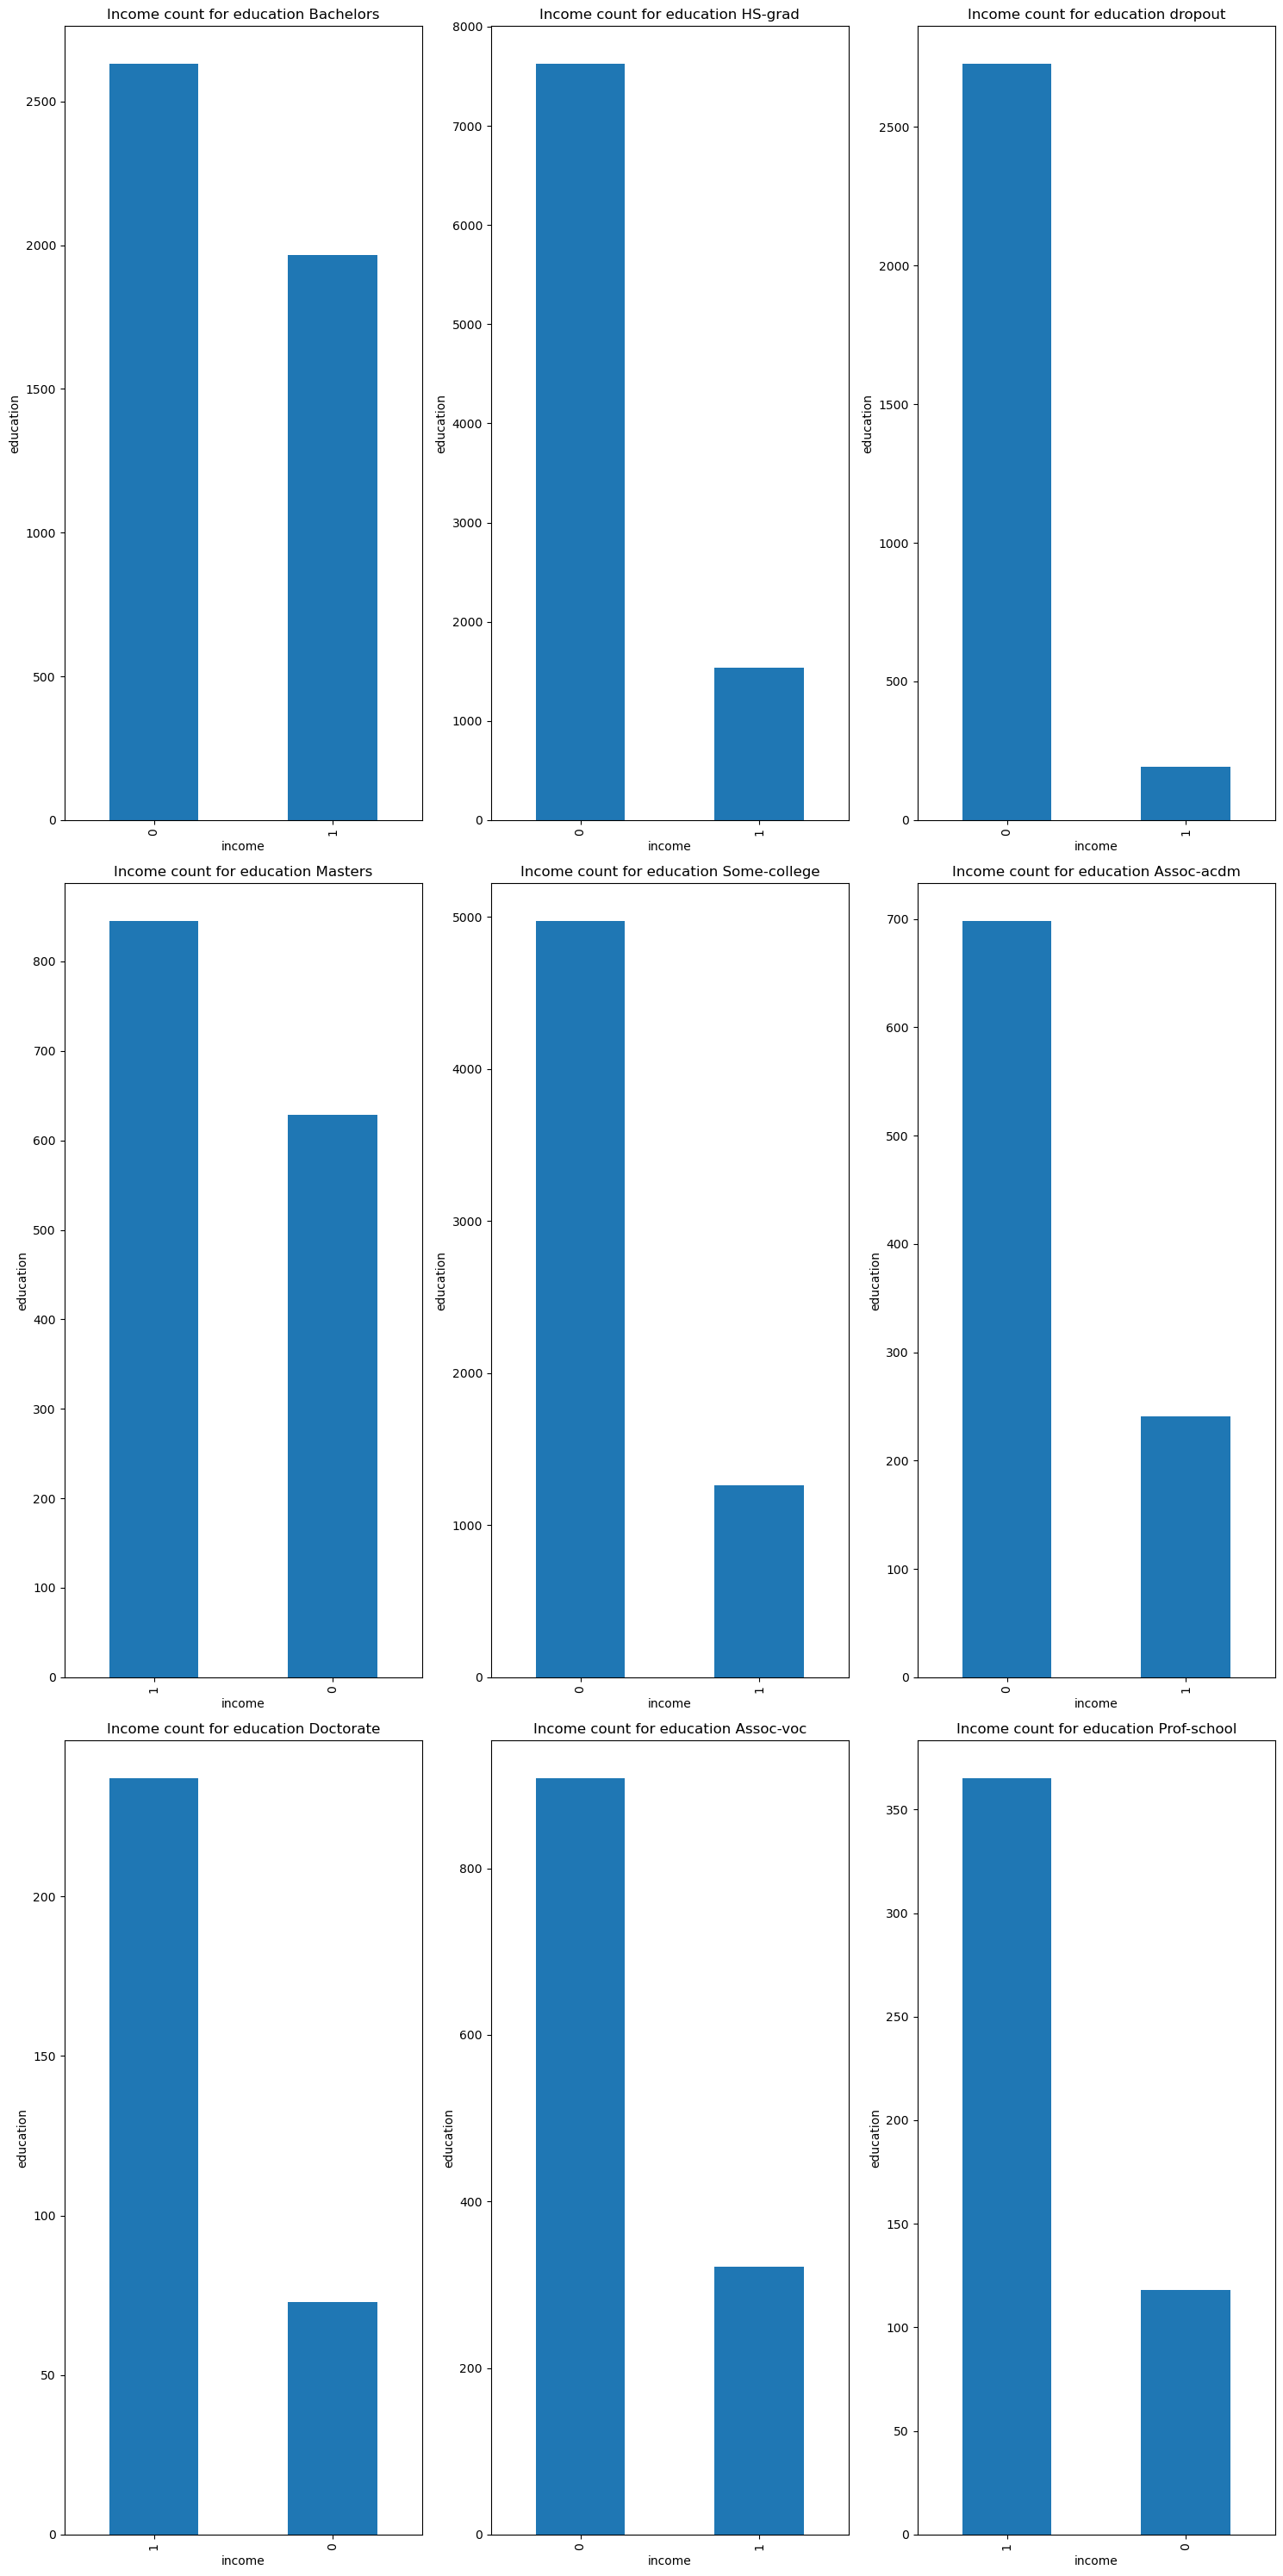

In [28]:
def plot_count_bar_char(column, value, ax):
    df[df[column]== value]['income'].value_counts().plot(kind='bar', ax= ax)
    ax.set_title(f"Income count for {column} {value}")
    ax.set_ylabel(column)


fig, axs = plt.subplots(nrows = 3, ncols=3, figsize=(15, 30))
educations = df['education'].unique()


for i, edu in enumerate(df['education'].unique()):
    row = i // 3
    col = i % 3
    plot_count_bar_char('education', edu, axs[row][col])

plt.tight_layout()
plt.show()



##### Observation
- When the education level increase the chance of having an income more than 50k increase.
- Lower education level increase the chance of having income less than 50k.
- The chance of having an income less than 50k increases when you dropout from school. 


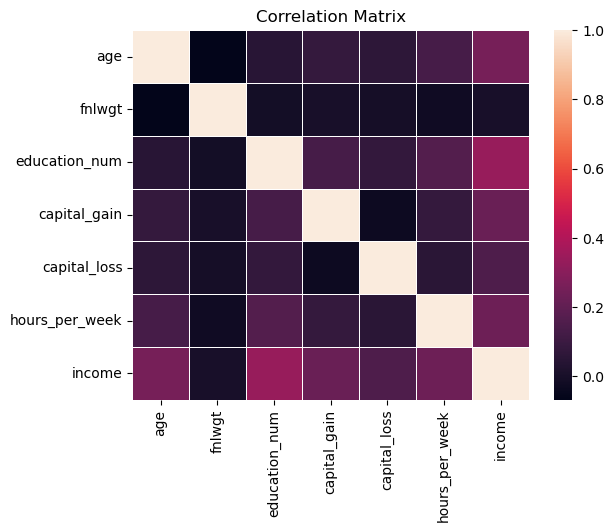

In [29]:
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [30]:
df['age'] = np.log10(df['age'] + 1)
df['fnlwgt'] = np.log10(df['fnlwgt'] + 1)
df['education_num'] = np.log10(df['education_num'] + 1)
df['capital_gain'] = np.log10(df['capital_gain'] + 1)
df['capital_loss'] = np.log10(df['capital_loss'] + 1)
df['hours_per_week'] = np.log10(df['hours_per_week'] + 1)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

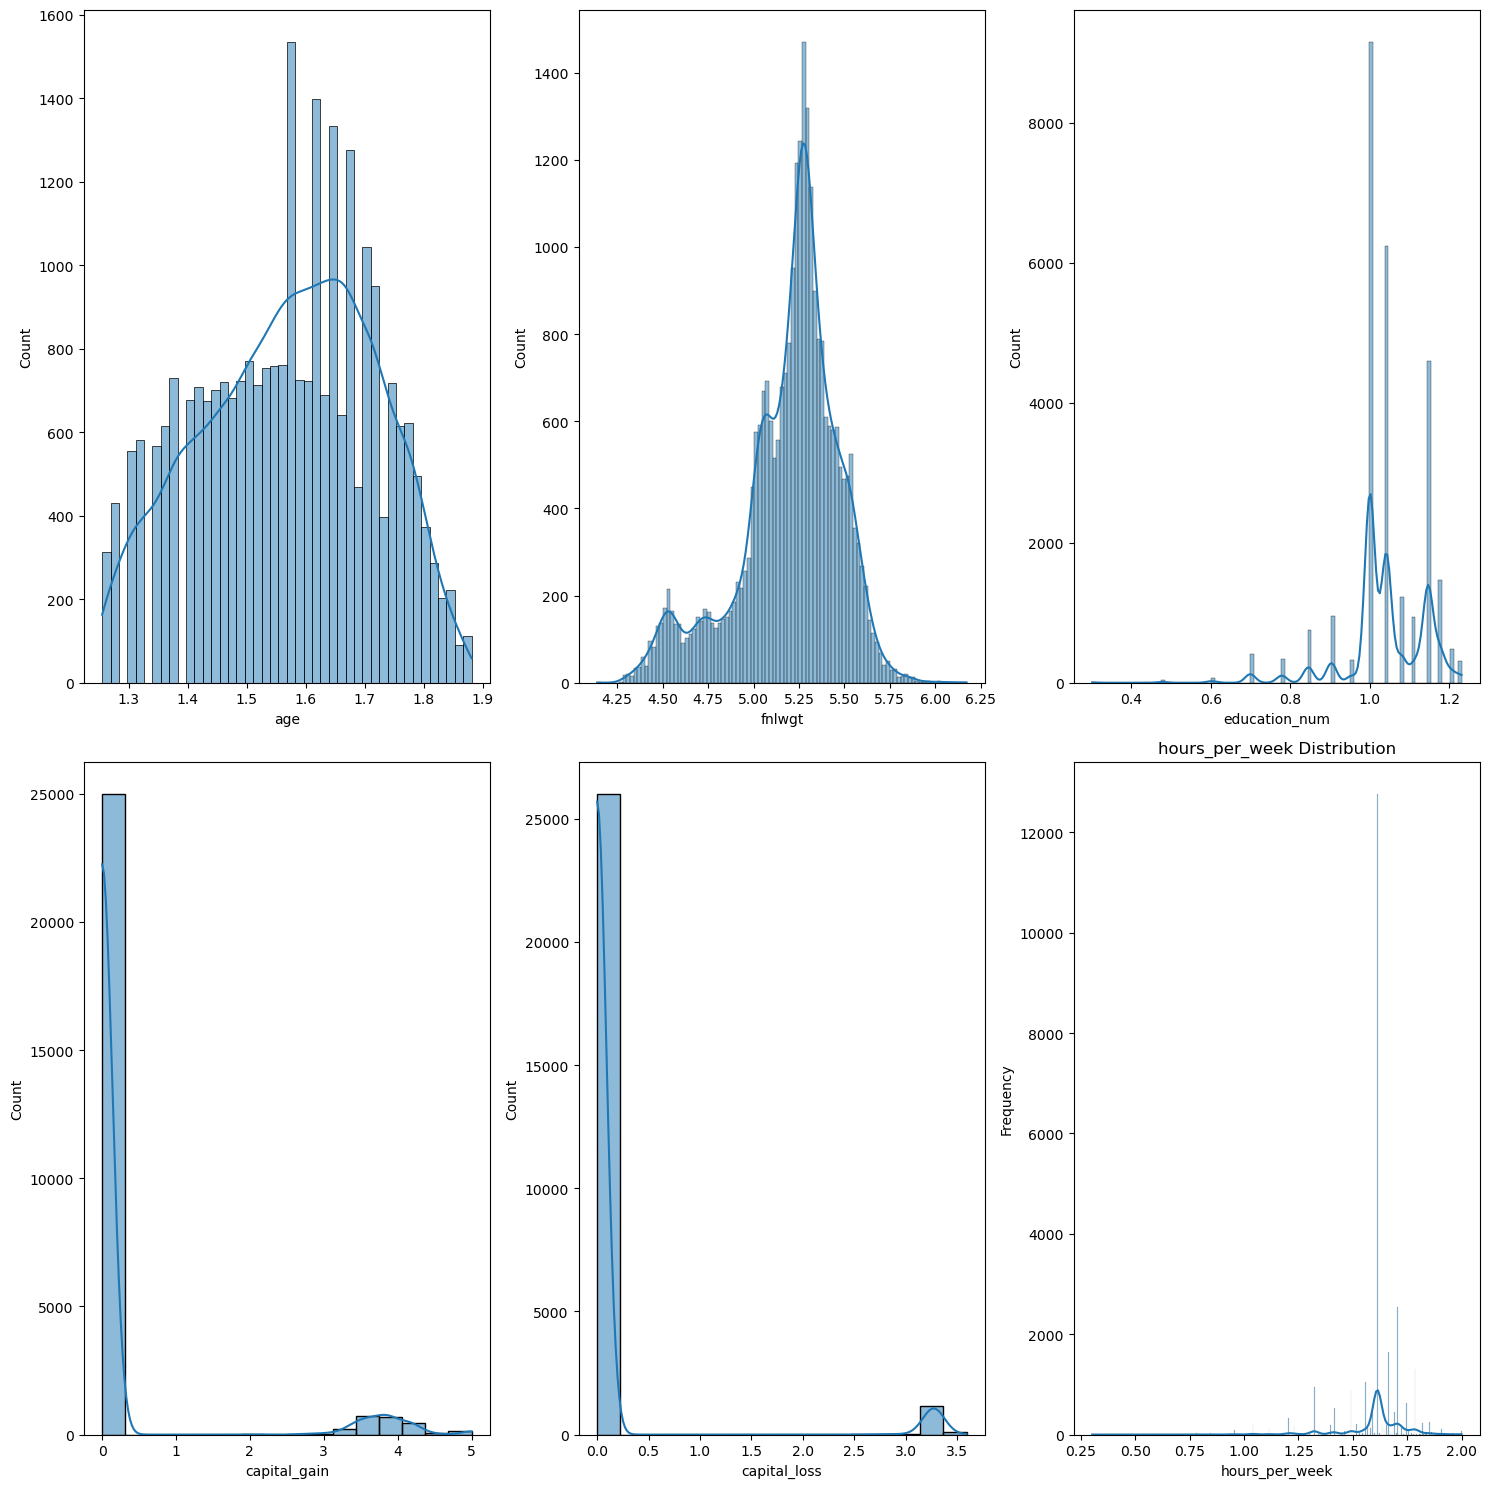

In [31]:
fig, axes = plt.subplots(2, 3, figsize=(15, 15))  

columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    plot_frequency_distribution(column, axes[row, col])
plt.tight_layout()
plt.show()

In [32]:
new_df = pd.get_dummies(df, dtype=int)
new_df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Other,race_White,sex_Female,sex_Male,native_country_United-States
0,1.602060,4.889397,1.146128,3.337459,0.0,1.612784,0,0,0,0,...,1,0,0,0,0,0,1,0,1,1
1,1.707570,4.920708,1.146128,0.000000,0.0,1.146128,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
2,1.591065,5.333743,1.000000,0.000000,0.0,1.612784,0,0,0,1,...,1,0,0,0,0,0,1,0,1,1
3,1.732394,5.370554,0.903090,0.000000,0.0,1.612784,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
5,1.579784,5.454209,1.176091,0.000000,0.0,1.612784,0,0,0,1,...,0,0,0,0,1,0,1,1,0,1


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
y = new_df['income']
X= new_df.drop(columns = ['income'])
print(X.shape)
print(y.shape)

(27349, 54)
(27349,)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## KNeighborsClassifier

In [36]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [37]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[4461  586]
 [ 663 1128]]


- Accuracy = the ratio of correctly predicted observations to the total observations
- Precision = the ability of the classifier to not label a negative sample as positive
- Recall = the ability of the classifier to find all the positive samples

In [38]:
precision_score = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)

print(f'precision score = {precision_score}')
print(f'recall_score = {recall}')

precision score = 0.6581096849474912
recall_score = 0.6298157453936348


In [39]:
cr = metrics.classification_report(y_test, predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      5047
           1       0.66      0.63      0.64      1791

    accuracy                           0.82      6838
   macro avg       0.76      0.76      0.76      6838
weighted avg       0.81      0.82      0.82      6838



## Decision Tree Classifier

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 
dtModel = DecisionTreeClassifier()
dtModel.fit(X_train, y_train)
prediction = dtModel.predict(X_test)



In [41]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[4461  586]
 [ 663 1128]]


In [42]:
precision_score = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)

print(f'precision score = {precision_score}')
print(f'recall_score = {recall}')

precision score = 0.6581096849474912
recall_score = 0.6298157453936348


## RandomForestClassifier

In [43]:
rfModel = RandomForestClassifier()
rfModel.fit(X_train, y_train)
prediction = rfModel.predict(X_test)


In [44]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[4461  586]
 [ 663 1128]]


In [45]:
precision_score = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)

print(f'precision score = {precision_score}')
print(f'recall_score = {recall}')

precision score = 0.6581096849474912
recall_score = 0.6298157453936348


In [46]:
cr = metrics.classification_report(y_test, predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      5047
           1       0.66      0.63      0.64      1791

    accuracy                           0.82      6838
   macro avg       0.76      0.76      0.76      6838
weighted avg       0.81      0.82      0.82      6838

